In [1]:
import os
import sys
cwd = os.getcwd()
project_dir = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.append(project_dir)

In [2]:
from IPython.display import Audio
from src.data_loader import *
from src.audio_util import *
import pandas as pd

# Test data loader

## Load MTAT data

In [3]:
mtat = pd.read_csv('../data/mtat_label.csv', index_col=0)
mtat.head()

,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,clarinet,...,soft,noise,choir,rap,hiphop,water,baroque,fiddle,english,filepath
0,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
1,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,1,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
2,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
3,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
4,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...


In [4]:
# Load MTAT with output format 'waveform'
mtat_waveform = AudioDS(mtat, '../data/', output='waveform')

In [5]:
# Grab a sample
index = 0
audio_filepath = mtat_waveform.get_filepath(index)
print(f'File: {audio_filepath}')
waveform, labels = mtat_waveform[index]

File: ../data/mtat/f/american_bach_soloists-j_s__bach_solo_cantatas-01-bwv54__i_aria-30-59.mp3


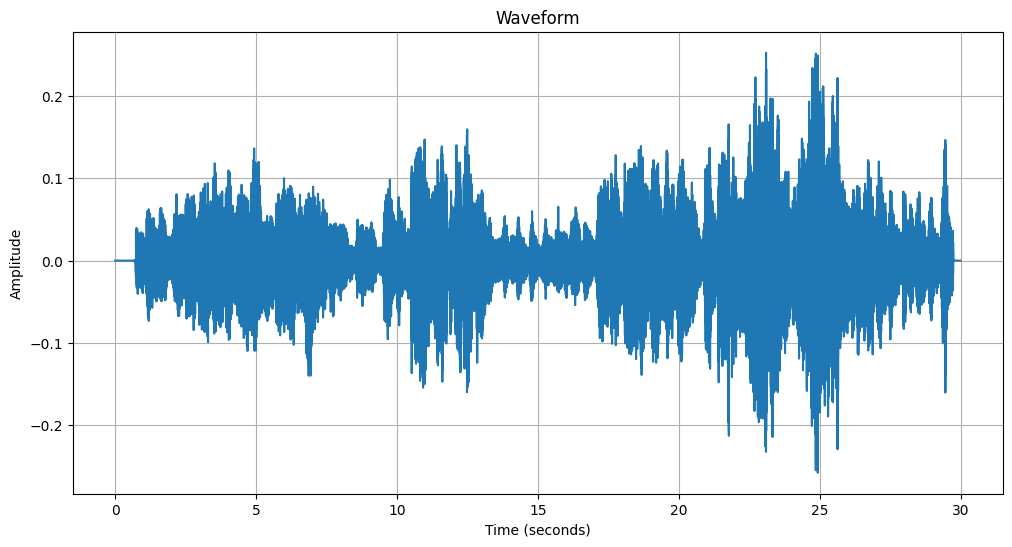

In [6]:
AudioPlot.plot_waveform(waveform, mtat_waveform.sample_rate)

In [7]:
Audio(audio_filepath)

In [8]:
# Load MTAT with output format 'mel_spec'
mtat_mel_spec = AudioDS(mtat, '../data/', output='mel_spec')

In [9]:
# Grab a sample
index = 200
audio_filepath = mtat_mel_spec.get_filepath(index)
print(f'File: {audio_filepath}')
mel_spec_db, labels = mtat_mel_spec[index]

File: ../data/mtat/b/satori-journey_to_other_worlds-01-astral_flight-610-639.mp3


In [10]:
print(mel_spec_db)

tensor([[[-45.1241, -45.1241, -45.1241,  ..., -45.1241, -45.1241, -45.1241],
         [-45.1241, -45.1241, -45.1241,  ..., -45.1241, -45.1241, -45.1241],
         [-45.1241, -45.1241, -45.1241,  ..., -45.1241, -45.1241, -45.1241],
         ...,
         [-45.1241, -45.1241, -45.1241,  ..., -45.1241, -45.1241, -45.1241],
         [-45.1241, -45.1241, -45.1241,  ..., -45.1241, -45.1241, -45.1241],
         [-45.1241, -45.1241, -45.1241,  ..., -45.1241, -45.1241, -45.1241]]])


In [11]:
# Relative path to data folder
import os
import sys

# Set system path to data
cwd = os.getcwd()
project_dir = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.append(project_dir)
data_path = os.path.join(project_dir, 'data/')
print(data_path)

/Users/ab/Projects/Tagging-Music-Sequences/data/


In [12]:
# Load train, validation and test csvs
train_labels = pd.read_csv(data_path + 'train_label.csv', index_col=0).reset_index(drop=True)
val_labels = pd.read_csv(data_path + 'val_label.csv', index_col=0).reset_index(drop=True)
test_labels = pd.read_csv(data_path + 'test_label.csv', index_col=0).reset_index(drop=True)

In [13]:
train_labels.head()

,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,clarinet,...,soft,noise,choir,rap,hiphop,water,baroque,fiddle,english,filepath
0,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/3/vito_paternoster-inzaffirio-09-preludio...
1,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/2/roots_of_rebellion-surfacing-08-so_far_...
2,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/e/briddes_roune-lenten_is_come-04-the_mil...
3,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/1/suzanne_teng-mystic_journey-08-clouds_a...
4,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/a/yongen-yello_haus-08-shackles_of_gold-3...


In [14]:
# Load audio files either as waveform + labels or mel_spec + labels
output = 'waveform'

train_data = AudioDS(train_labels, data_path, output=output)
val_data = AudioDS(val_labels, data_path, output=output)
test_data = AudioDS(test_labels, data_path, output=output)

In [15]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [21]:
# Display audio and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# Retrieve a sample
audio = train_features[0]
label = train_labels[0]
print(f"Label: {label}")

Feature batch shape: torch.Size([64, 1, 480000])
Labels batch shape: torch.Size([64, 134])
Label: tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, F

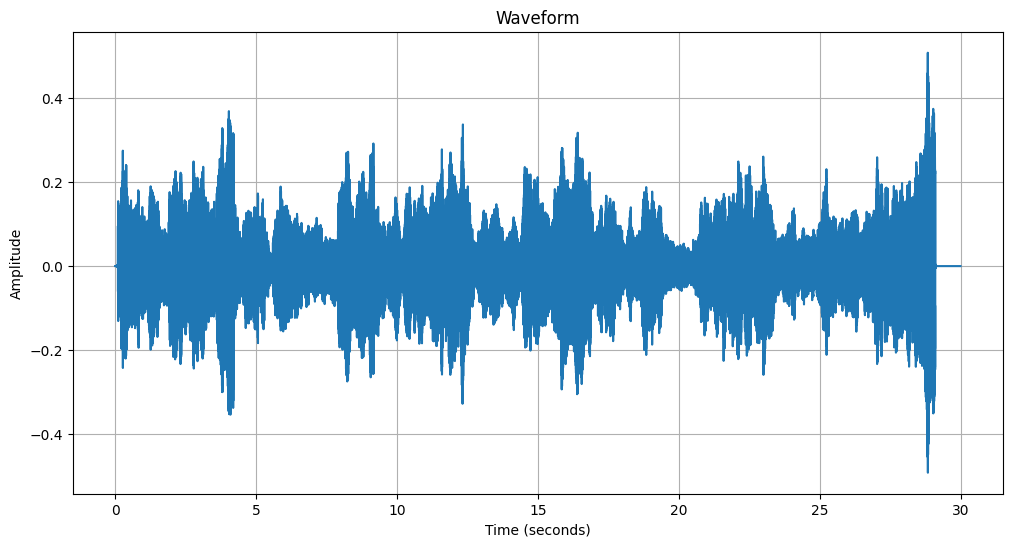

In [22]:
AudioPlot.plot_waveform(audio, train_data.sample_rate)

In [23]:
Audio(waveform.numpy()[0], rate=train_data.sample_rate)

